In [2]:
#import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from matplotlib.ticker import FuncFormatter

In [3]:
def findClosest(arr, target):
    pos = 0
    for a in arr:
        if abs(target-a) < abs(arr[pos]-target):
            pos = arr.index(a)  
    #print(target, arr[pos])
    return pos
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

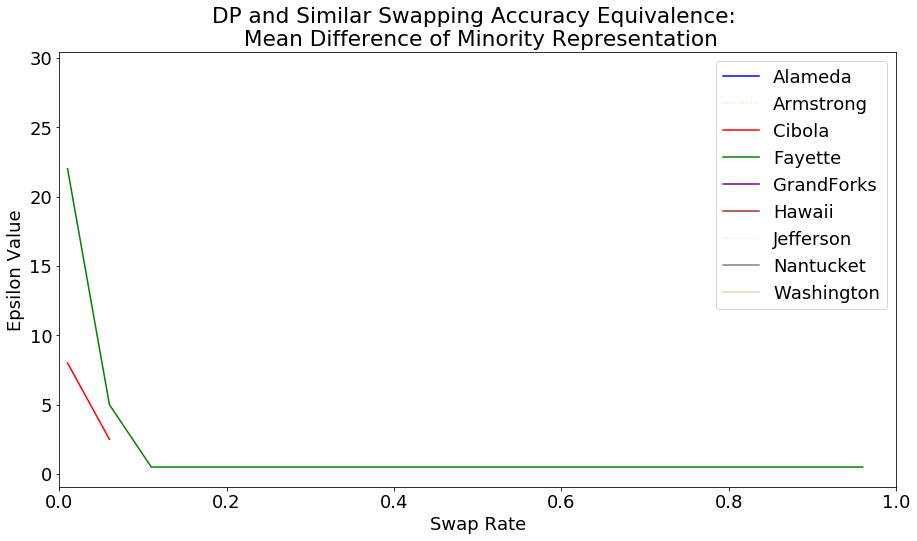

In [3]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
colors = ['blue', 'orange', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
#counties = ['Armstrong']
plt.figure(figsize=(15,8))
c = -1
for county in counties:
    c+=1
    swap_x = []
    swap_y = []
    dp_x = []
    dp_y = []

    swap_df = pd.read_csv (r'mean_dif/'+county+'/similar/swapping_final.csv')
    dp_df = pd.read_csv (r'mean_dif/'+county+'/dp/dp.csv')
    
    #print(dp_df)
    #for i, row in dp_df.iterrows():
    nn=0
    for i, row in swap_df.iterrows():
        swap_x.append(float(row['filename']))
        swap_y.append(row['mean_difference'])
    
    for i, row in dp_df.iterrows():
        dp_x.append(float(row['filename']))
        dp_y.append(row['mean_difference'])
    
    dp_x = [i * 5 for i in dp_x]

    close_swap = []
    close_swap1 = []
    close_dp = []
    close_dp1 = []
    value = []
    
    pos = 0
    for y in swap_y:
        closest = findClosest(dp_y, y)
#         print(dp_y[closest])
#         print(y)
        if dp_y[closest] <= y and abs(dp_y[closest]-y) <=.05:
            close_swap.append(swap_x[pos])
            close_dp.append(dp_x[closest])

        elif dp_y[closest] <= y:
            close_swap1.append(swap_x[pos])
            close_dp1.append(dp_x[closest])
            
        pos+=1

    plt.rcParams.update({'font.size': 18})
    axes= plt.axes()
    plt.xlabel('Swap Rate')
    plt.xlim([0,1])
    #plt.ylim([0,5])
    plt.ylabel('Epsilon Value')
    plt.title('DP and Similar Swapping Accuracy Equivalence: \n Mean Difference of Minority Representation')
    if county == 'Armstrong':
        plt.plot(close_swap, close_dp, ':', label=county, alpha=0.3, color = colors[c])
    elif county == 'Jefferson':
        plt.plot(close_swap, close_dp, '--', label=county, alpha=0.3, color = colors[c])
    elif county == 'Washington':
        plt.plot(close_swap, close_dp, '-', label=county, alpha=0.3, color = colors[c])
    else:
        plt.plot(close_swap, close_dp, label=county, color = colors[c])
    handles, labels = axes.get_legend_handles_labels()
    #plt.plot(close_swap1, close_dp1, ':',label=county, color = colors[c+1])
    axes.legend(handles, labels)
    plt.savefig('test1.png')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

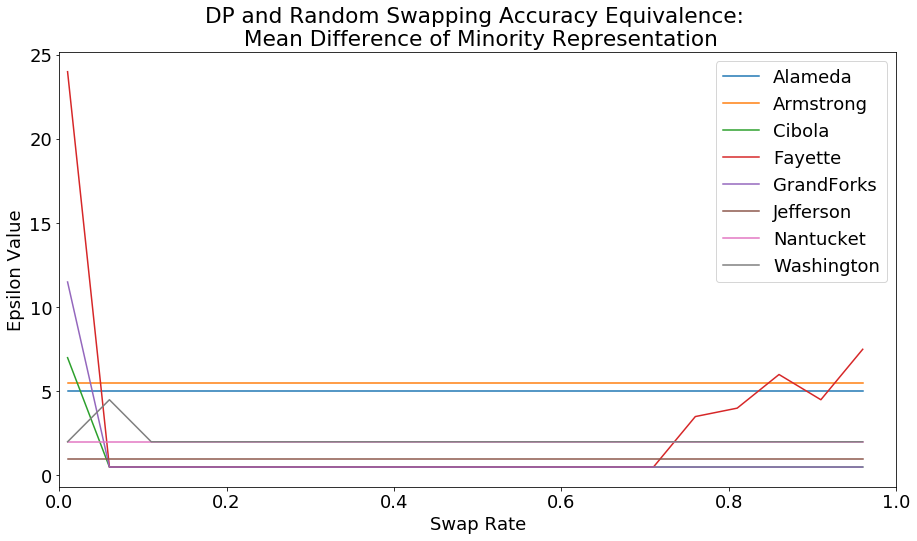

In [4]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks','Jefferson', 'Nantucket', 'Washington']

plt.figure(figsize=(15,8))
for county in counties:

    swap_x = []
    swap_y = []
    dp_x = []
    dp_y = []

    swap_df = pd.read_csv (r'mean_dif/'+county+'/random/swapping_final.csv')
    dp_df = pd.read_csv (r'mean_dif/'+county+'/dp/dp.csv')
    #for i, row in dp_df.iterrows():
    nn=0
    for i, row in swap_df.iterrows():
        swap_x.append(float(row['filename']))
        swap_y.append(row['mean_difference'])
    
    for i, row in dp_df.iterrows():
        dp_x.append(float(row['filename']))
        dp_y.append(row['mean_difference'])
    
    dp_x = [i * 5 for i in dp_x]
#     print(swap_x)
#     print(swap_y)
#     print(dp_x)
#     print(dp_y)
    close_swap = []
    close_dp = []
    value = []
    
    pos = 0
    for y in swap_y:
        closest = findClosest(dp_y, y)
        close_swap.append(swap_x[pos])
        close_dp.append(dp_x[closest])
        value.append(y)
        pos+=1

    plt.rcParams.update({'font.size': 18})
    axes= plt.axes()
    plt.xlabel('Swap Rate')
    plt.xlim([0,1])
    plt.ylabel('Epsilon Value')
    plt.title('DP and Random Swapping Accuracy Equivalence: \n Mean Difference of Minority Representation')
    plt.plot(close_swap, close_dp, label=county)
    handles, labels = axes.get_legend_handles_labels()
    axes.legend(handles, labels)
    plt.savefig('test1.png')


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[0, 0.01, 0.06000000000000001, 0.11, 0.16000000000000006, 0.21, 0.26, 0.31000000000000005, 0.36000000000000004, 0.41, 0.46, 0.51, 0.56, 0.6100000000000001, 0.66, 0.7100000000000001, 0.76, 0.81, 0.8600000000000001, 0.91, 0.96]
<class 'list'>
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[0, 0.01, 0.06000000000000001, 0.11, 0.16000000000000006, 0.21, 0.26, 0.31000000000000005, 0.36000000000000004, 0.41, 0.46, 0.51, 0.56, 0.6100000000000001, 0.66, 0.7100000000000001, 0.76, 0.81, 0.8600000000000001, 0.91, 0.96]
<class 'list'>
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[0, 0.01, 0.06000000000000001, 0.11, 0.16000000000000006, 0.21, 0.26, 0.31000000000000005, 0.36000000000000004, 0.41, 0.46, 0.51, 0.56, 0.6100000000000001, 0.66, 0.7100000000000001, 0.76, 0.81, 0.8600000000000001, 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

<class 'list'>
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[0, 0.01, 0.06000000000000001, 0.11, 0.16000000000000006, 0.21, 0.26, 0.31000000000000005, 0.36000000000000004, 0.41, 0.46, 0.51, 0.56, 0.6100000000000001, 0.66, 0.7100000000000001, 0.76, 0.81, 0.8600000000000001, 0.91, 0.96]
<class 'list'>
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[0, 0.01, 0.06000000000000001, 0.11, 0.16000000000000006, 0.21, 0.26, 0.31000000000000005, 0.36000000000000004, 0.41, 0.46, 0.51, 0.56, 0.6100000000000001, 0.66, 0.7100000000000001, 0.76, 0.81, 0.8600000000000001, 0.91, 0.96]
<class 'list'>
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[0, 0.01, 0.06000000000000001, 0.11, 0.16000000000000006, 0.21, 0.26, 0.31000000000000005, 0.36000000000000004, 0.41, 0.46, 0.51, 0.56, 0.6100000000000001, 0.66, 0.7100000000000001, 0.76, 0.81, 0.8600

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

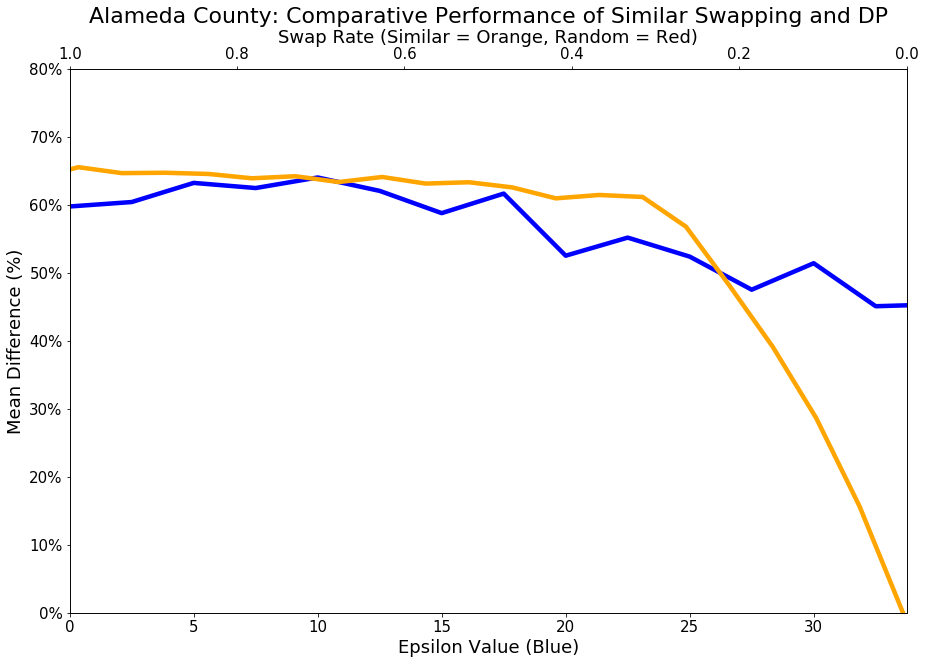

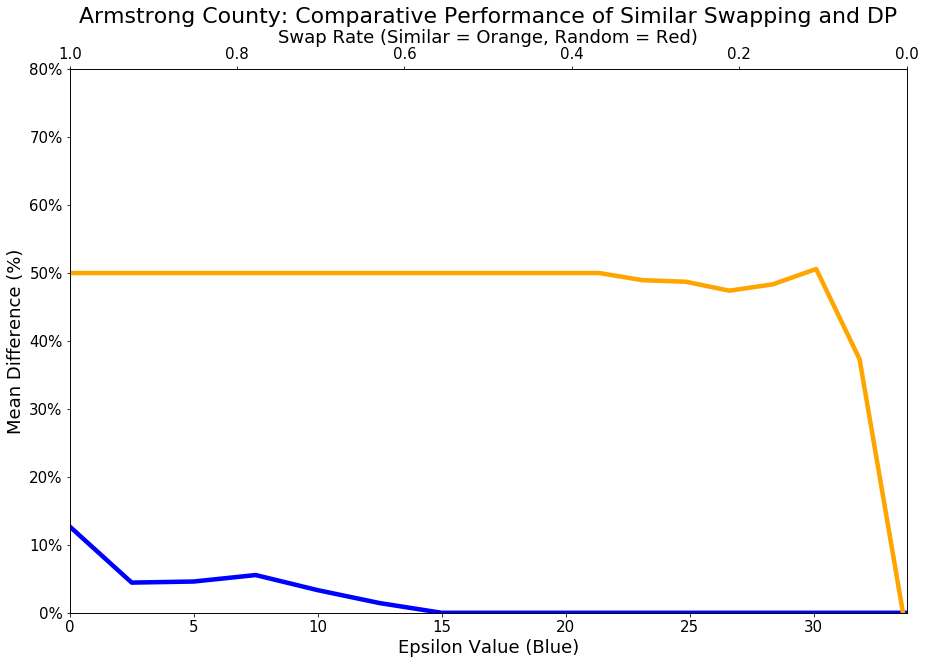

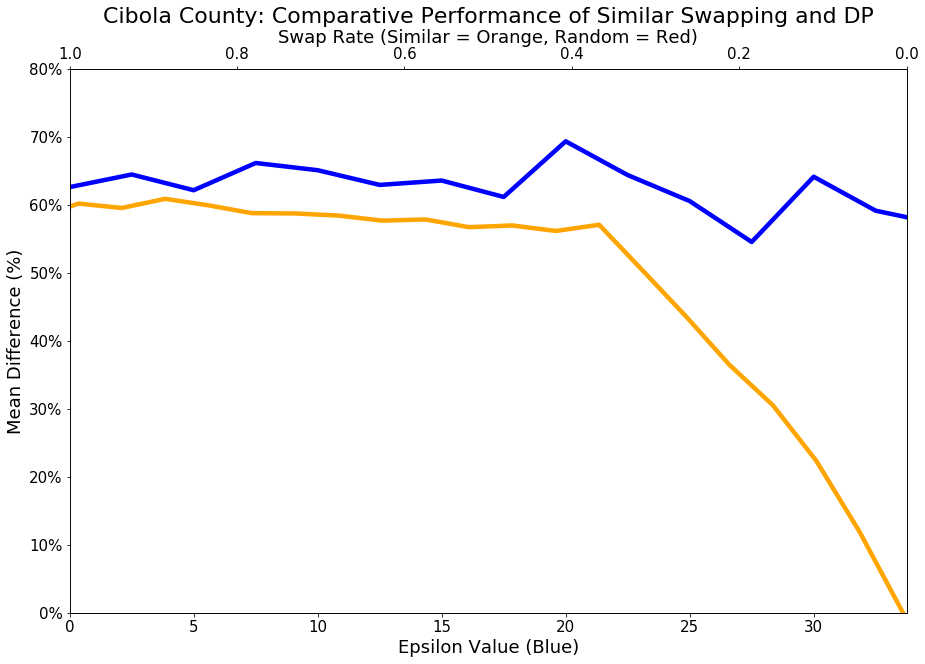

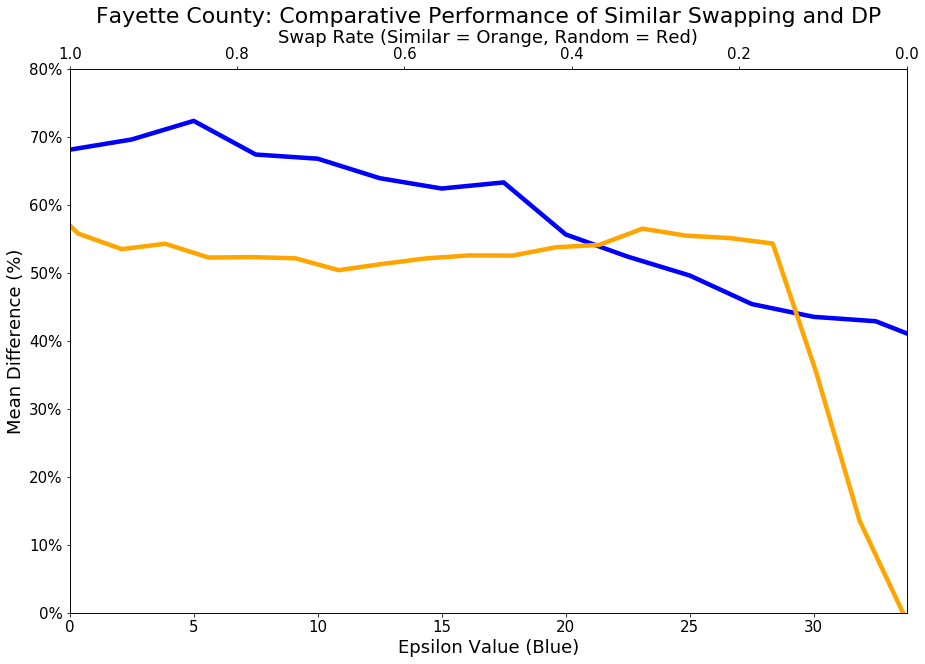

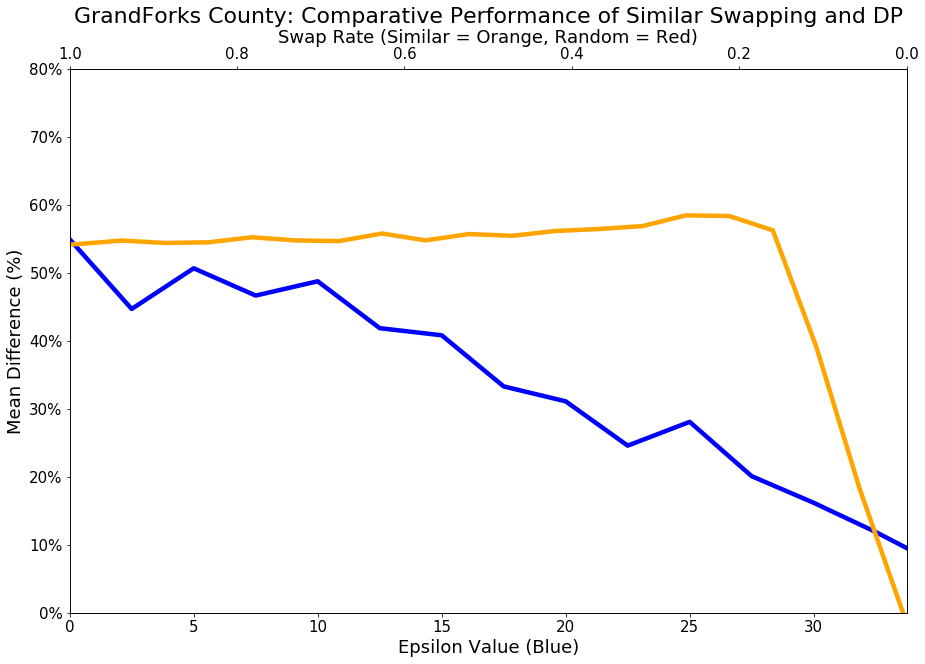

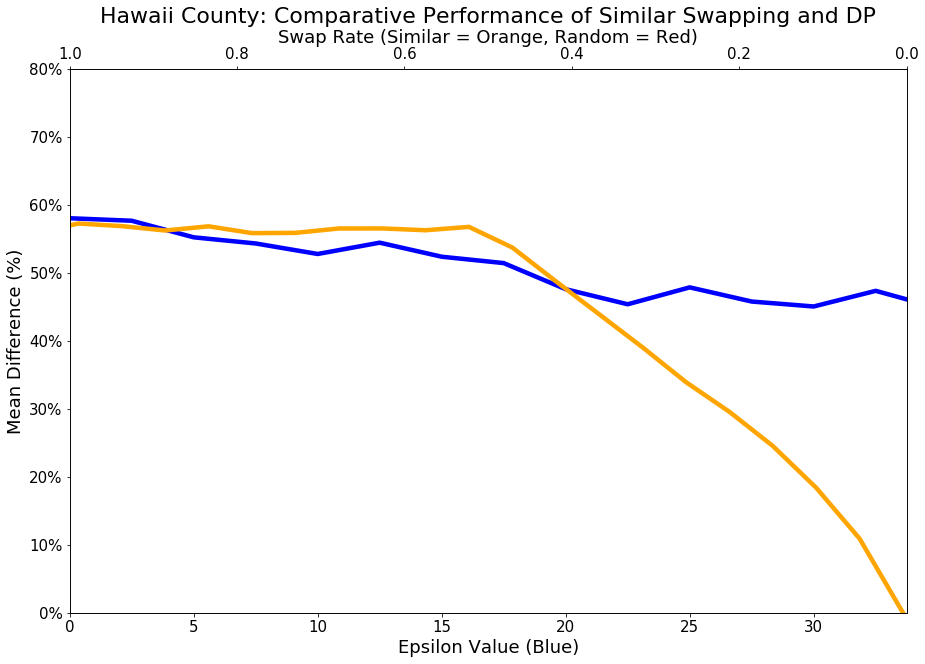

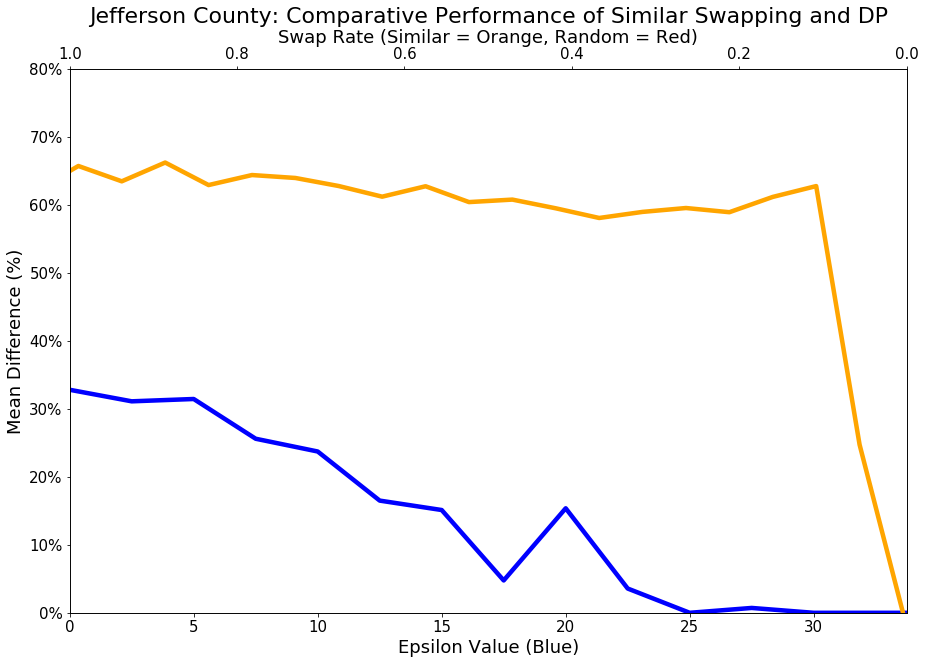

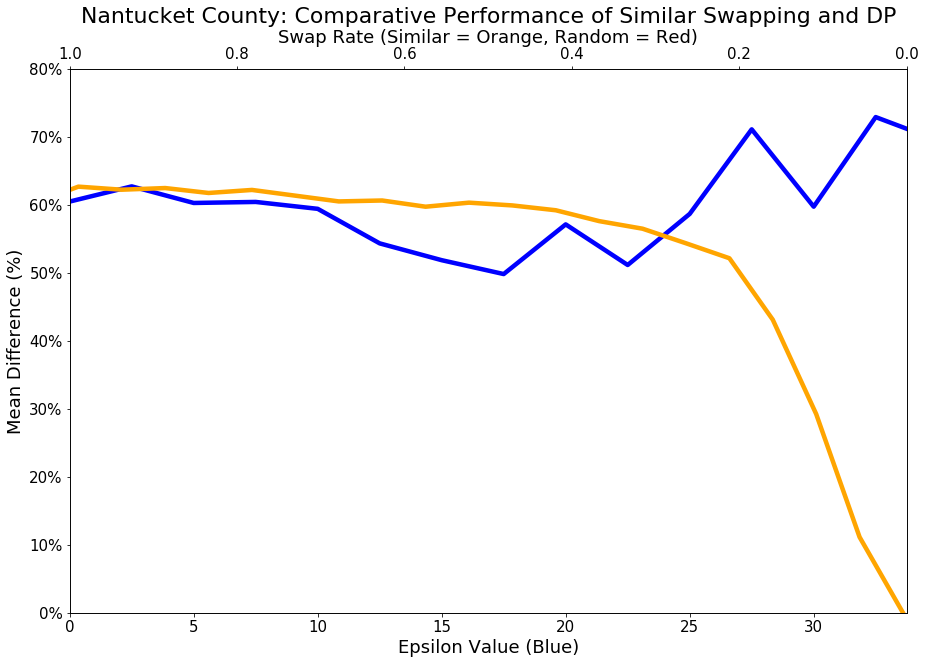

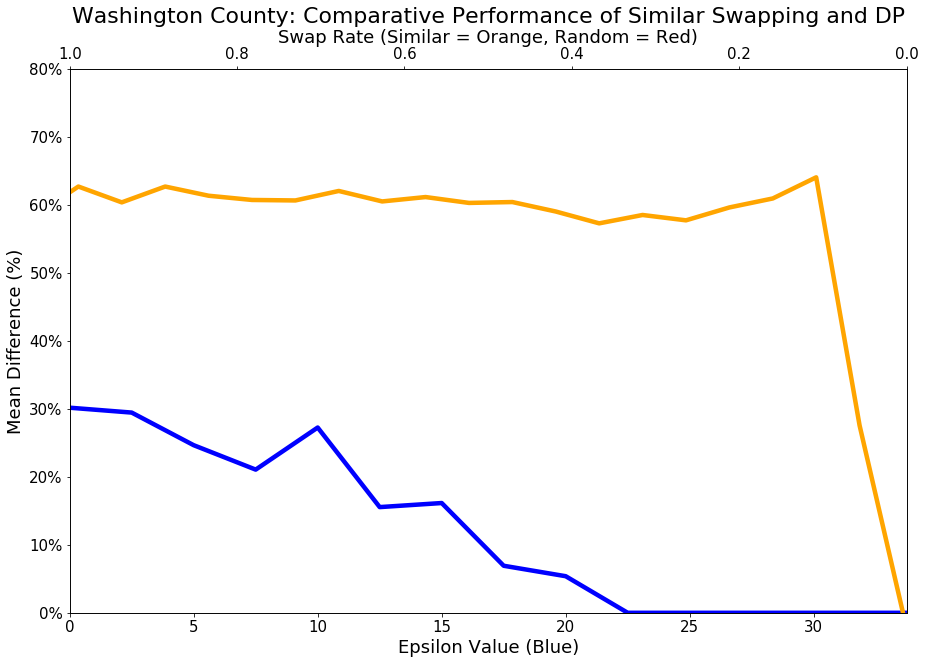

In [34]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
#counties = ['Alameda']
#counties = ['Armstrong']
#counties = ['Cibola']
#counties = ['Fayette']
#counties = ['GrandForks']
#counties = ['Hawaii']
#counties = ['Jefferson']
#counties = ['Nantucket']
#counties = ['Washington']

for county in counties:

    swap_x = []
    swap_y = []
    dp_x = []
    dp_y = []
    
    swap_x2 = []
    swap_y2 = []

    swap_df = pd.read_csv (r'mean_dif/'+county+'/similar/swapping_final7.csv')
    #swap2_df = pd.read_csv (r'mean_dif/'+county+'/random/swapping_final.csv')
    dp_df = pd.read_csv (r'mean_dif/'+county+'/dp/dp7.csv')
    #for i, row in dp_df.iterrows():
    nn=0
    swap_x.append(0)
    swap_y.append(0)
    for i, row in swap_df.iterrows():
        swap_x.append(float(row['filename']))
        swap_y.append(row['mean_difference'])
    
#     swap_x2.append(0)
#     swap_y2.append(0)
#     for i, row in swap2_df.iterrows():
#         swap_x2.append(float(row['filename']))
#         swap_y2.append(row['mean_difference'])
    
    
    for i, row in dp_df.iterrows():
        dp_x.append(float(row['filename']))
        dp_y.append(row['mean_difference'])
    
    print(dp_x)
    print(swap_x)
    
    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of Similar Swapping and DP', size=22)
    
    ax1 = fig.add_subplot()
    
    ax1.plot([i * 5 for i in dp_x], dp_y, color = 'blue', linewidth=4.5)
    
    ax1.set_xlim([0,33.75])
    ax1.set_xlabel("Epsilon Value (Blue)", size=18)
    ax1.set_ylabel("Mean Difference (%)", size=18)
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    plt.xticks(size=15)
    plt.yticks(size=15)
    
    ax2 = fig.add_subplot()
    
    print(type(swap_y))
    for s in range(0, len(swap_x)):
        swap_y[s] = str(swap_y[s])
        
    swap_y.reverse()
    
    for s in range(0, len(swap_x)):
        swap_y[s] = float(swap_y[s])
    
    s1 = [x*35 for x in swap_x]
    
#     for s in range(0, len(swap_x2)):
#         swap_y2[s] = str(swap_y2[s])
        
#     swap_y2.reverse()
    
#     for s in range(0, len(swap_x2)):
#         swap_y2[s] = float(swap_y2[s])
    
#     s2 = [x*35 for x in swap_x2]
   
    
    ax2.plot(s1, swap_y, color = 'orange', linewidth = 4.5)
#     ax2.plot(s2, swap_y2, color = 'red', linewidth = 4.5)
    #ax2.invert()
    
    ax2 = ax1.twiny()
    ax2.set_xlabel("Swap Rate (Similar = Orange, Random = Red)", size=18)
    ax2.set_xlim([1,0])
    ax2.set_ylim(0,.8)
    plt.xticks(size=15)
    
    plt.yticks(size=15)
    #plt.savefig('../figures/compare_3_meandif/lessthick/'+county+'.png')
    
    
    
    
    #handles, labels = axes.get_legend_handles_labels()
    
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.3680617271856496, 0.3592928857540927, 0.3618712774294671, 0.3662968913270637, 0.33432769505398824, 0.34641712382445145, 0.3569190613026821, 0.3496890020898642, 0.339041078892372, 0.33699762713340314, 0.3266686259143157, 0.3373275862068965, 0.324626066701498, 0.31571381922675035, 0.31549399164054337, 0.3156144853709508, 0.2997772988505747, 0.2871728056426333, 0.2824725705329155, 0.27969435736677106, 0.27923981191222563, 0.2686598746081504, 0.2503722570532915, 0.2315791536050157, 0.2375039184952978, 0.2345258620689655, 0.21712382445141068, 0.2099568965517241, 0.17774294670846394, 0.19171238244514108, 0.16094043887147333, 0.15811520376175556, 0.14019200626959252, 0.1340478056426333, 0.10395768025078372, 0.08231191222570536, 0.10873432601880878, 0.07965125391849531, 0.06847178683385581, 0.0747962382445141, 0.05456112852664576, 0.03813871473354233, 0.031818181818181815, 0.03278605015673981, 0.03204545454545455, 0.020681818181818176, 0.02136363636363636, 0.0225, 0.007954545454545455, 0.00

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.0, 0.0, 0.002857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
<class 'list'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.1810784313725489, 0.20816993464052266, 0.19591036414565807, 0.16634547152194204, 0.2104584500466852, 0.17146591970121375, 0.1594771241830064, 0.18015126050420155, 0.15476657329598498, 0.1405042016806722, 0.15450980392156854, 0.1356862745098038, 0.1372399626517273, 0.13199346405228754, 0.1217320261437908, 0.1408496732026143, 0.08843137254901955, 0.1010457516339869, 0.08117647058823528, 0.08235294117647056, 0.056470588235294085, 0.07647058823529408, 0.050588235294117635, 0.04117647058823529, 0.04823529411764705, 0.04, 0.036274509803921565, 0.030522875816993464, 0.018823529411764708, 0.019411764705882358, 0.017647058823529415, 0.010588235294117648, 0.01, 0.017647058823529415, 0.011176470588235295, 0.004705882352941176, 0.003529411764705882, 0.006470588235294118, 0.001176470588235294, 0.000588235294117647, 0.001176470588235294, 0.0, 0.005294117647058822, 0.0029411764705882357, 0.002352941176470588, 0.004117647058823529, 0.003529411764705883, 0.001176470588235294, 0.0, 0.0, 0.00117647058

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.5624417989417991, 0.5558128306878306, 0.5306593915343913, 0.544671626984127, 0.5506140873015872, 0.5429272486772486, 0.5498234126984128, 0.5468716931216931, 0.5488816137566138, 0.4501250000000001, 0.4408214285714289, 0.4341785714285715, 0.4168750000000001, 0.4067142857142857, 0.4011190476190478, 0.3978928571428572, 0.39057142857142857, 0.3834464285714285, 0.35823214285714305, 0.35796428571428585, 0.3540714285714286, 0.3591964285714287, 0.3485714285714285, 0.3261428571428571, 0.3218750000000001, 0.3257678571428572, 0.3243571428571429, 0.2885892857142857, 0.3134821428571428, 0.2980535714285715, 0.2871785714285714, 0.2786250000000001, 0.2731071428571428, 0.2661607142857144, 0.2384821428571429, 0.23966071428571414, 0.2298392857142857, 0.23217857142857135, 0.21048214285714284, 0.2007857142857143, 0.18333928571428576, 0.19596428571428576, 0.1817678571428572, 0.16251785714285713, 0.16471428571428567, 0.15914285714285714, 0.1436428571428572, 0.12135714285714284, 0.10664285714285712, 0.09582

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.3806054470167512, 0.3539622774327125, 0.35805576886881224, 0.3555332768680596, 0.3578575287031808, 0.3622356672313195, 0.3624388198757764, 0.3567591116130247, 0.3815143233578017, 0.2913932618106532, 0.2674968944099377, 0.2735860248447205, 0.26733722943722943, 0.24284940711462455, 0.23339316770186336, 0.22827024280067765, 0.22303775644645207, 0.22128763410502544, 0.19937784679089027, 0.20704997176736306, 0.19752608695652152, 0.1864347826086956, 0.16562877846790885, 0.18755403726708067, 0.14566956521739127, 0.13579254658385087, 0.12679130434782604, 0.13414782608695652, 0.09226149068322982, 0.09439254658385096, 0.08233043478260871, 0.07346956521739133, 0.06530559006211183, 0.052367701863354064, 0.03860000000000001, 0.03677391304347828, 0.03307826086956522, 0.02660000000000001, 0.017243478260869558, 0.02300000000000001, 0.016086956521739134, 0.018243478260869563, 0.012156521739130434, 0.008313043478260871, 0.007878260869565216, 0.01377391304347826, 0.006313043478260868, 0.00206956521739

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.3021167737209827, 0.302078839869281, 0.3041403256704981, 0.2924203079220193, 0.2941376140973631, 0.29263569134550377, 0.2942190669371197, 0.3015156285215236, 0.2953062035158891, 0.2986124328562843, 0.29534277101645257, 0.2861144424723912, 0.3094687077417173, 0.3026822576252724, 0.2914792511832319, 0.2920912215460897, 0.2933051329727294, 0.28364671371422123, 0.2944651979565773, 0.2837128127112915, 0.2918069970325295, 0.2836898148148148, 0.2835973208248818, 0.29949342883705193, 0.2851297329276537, 0.2926335408684547, 0.2794179625873338, 0.2745818120351589, 0.2808406721884155, 0.28428648298399817, 0.2807925118323191, 0.2709868013297274, 0.2632878634212305, 0.2662930189317107, 0.2682958643227407, 0.286194096987454, 0.2825276087446473, 0.26679518819021864, 0.27602729885057475, 0.27675496300052577, 0.2693654496281271, 0.2887822853279243, 0.2843583126737286, 0.2970941232814967, 0.2908983171812786, 0.2963688115092782, 0.2954745457570002, 0.29570990158515514, 0.3001636804146945, 0.2947098828

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.017142857142857137, 0.01714285714285714, 0.026428571428571426, 0.009999999999999998, 0.023571428571428577, 0.021428571428571432, 0.014285714285714284, 0.0064285714285714285, 0.013571428571428571, 0.007142857142857142, 0.003571428571428571, 0.00857142857142857, 0.012142857142857144, 0.0021428571428571425, 0.005714285714285714, 0.0007142857142857143, 0.0007142857142857143, 0.0, 0.005, 0.0, 0.0021428571428571425, 0.0021428571428571425, 0.0007142857142857143, 0.0, 0.0014285714285714286, 0.0, 0.0007142857142857143, 0.0, 0.0, 0.0007142857142857143, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.07815217391304351, 0.06271739130434786, 0.06554347826086959, 0.06554347826086958, 0.057581521739130434, 0.050951086956521736, 0.06823369565217394, 0.0545788043478261, 0.0627038043478261, 0.027717391304347826, 0.04149456521739132, 0.032364130434782604, 0.034673913043478256, 0.03820652173913044, 0.03347826086956522, 0.019755434782608692, 0.016521739130434778, 0.019565217391304342, 0.01652173913043478, 0.006086956521739131, 0.009130434782608695, 0.013478260869565216, 0.006521739130434783, 0.012173913043478259, 0.004782608695652175, 0.007826086956521738, 0.003478260869565217, 0.005652173913043478, 0.007826086956521741, 0.0013043478260869564, 0.00043478260869565214, 0.0, 0.0, 0.00043478260869565214, 0.0, 0.0017391304347826085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013043478260869564, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[0.020714285714285716, 0.019285714285714285, 0.027321428571428573, 0.025535714285714283, 0.01357142857142857, 0.014821428571428569, 0.015714285714285712, 0.011428571428571423, 0.003571428571428571, 0.004285714285714285, 0.009285714285714286, 0.015714285714285715, 0.005714285714285714, 0.004285714285714285, 0.004999999999999999, 0.017857142857142856, 0.005, 0.004999999999999999, 0.005, 0.005, 0.0, 0.005, 0.0, 0.0, 0.003571428571428571, 0.0, 0.0, 0.0014285714285714286, 0.0, 0.0007142857142857143, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014285714285714286, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

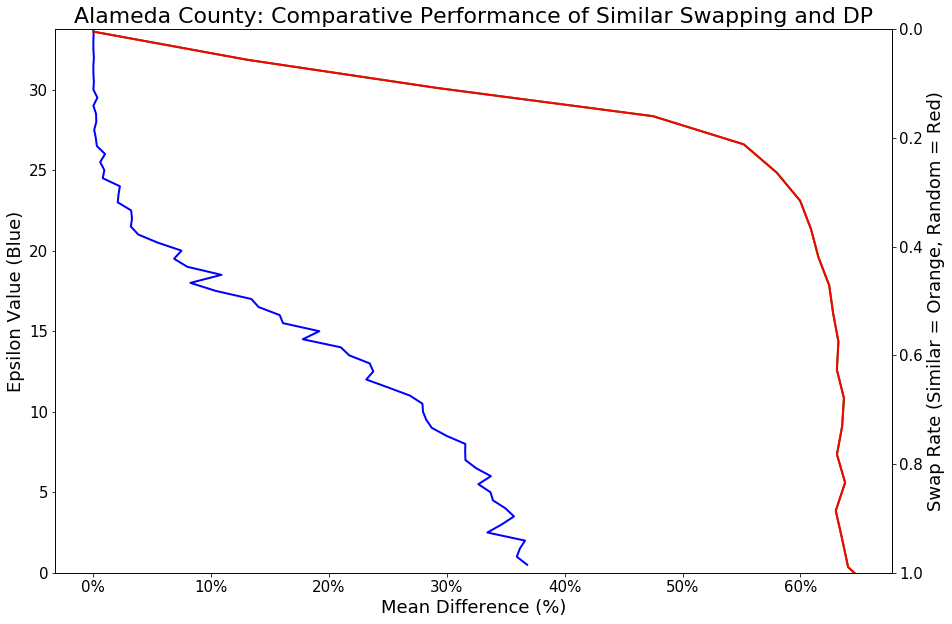

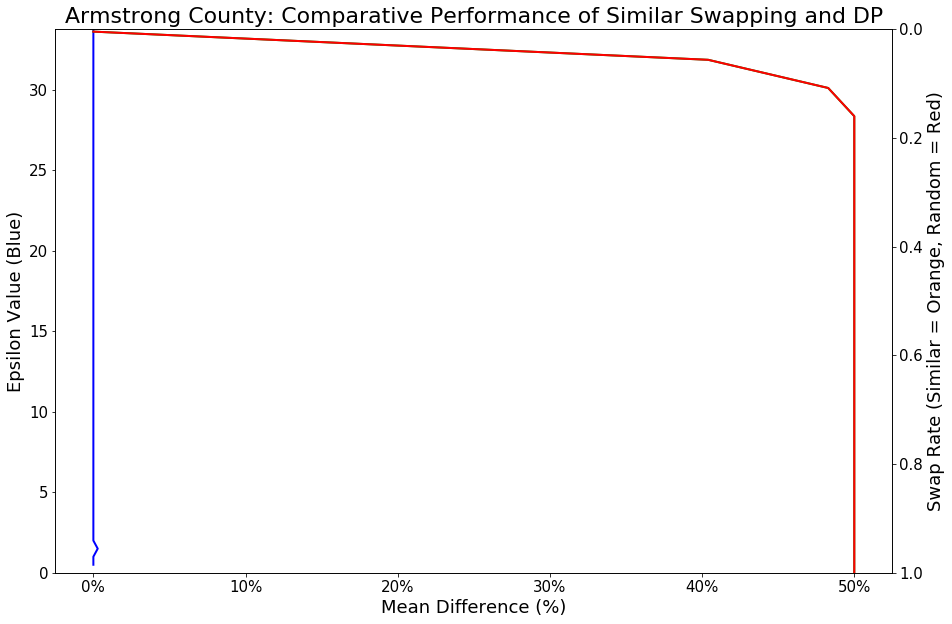

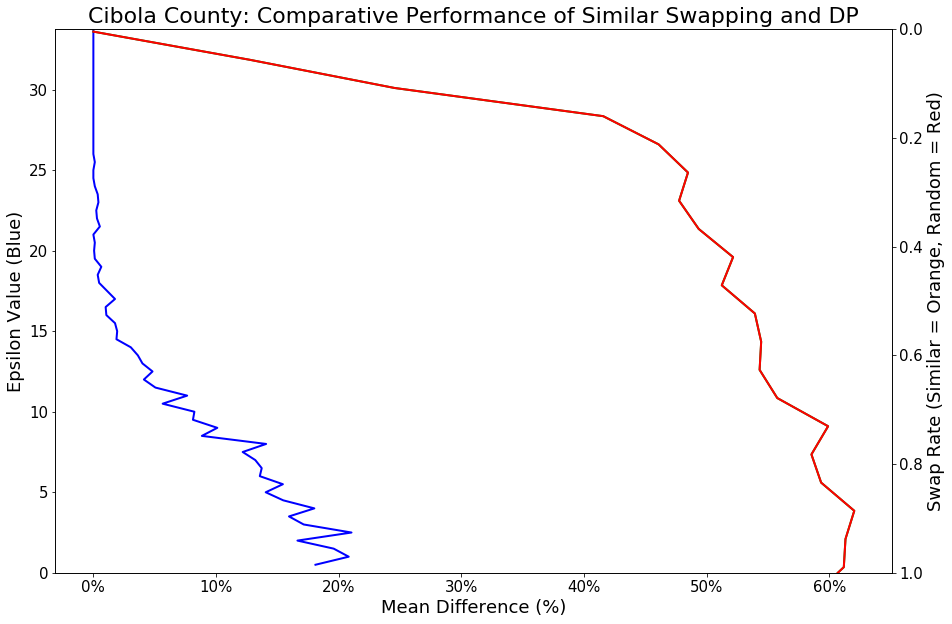

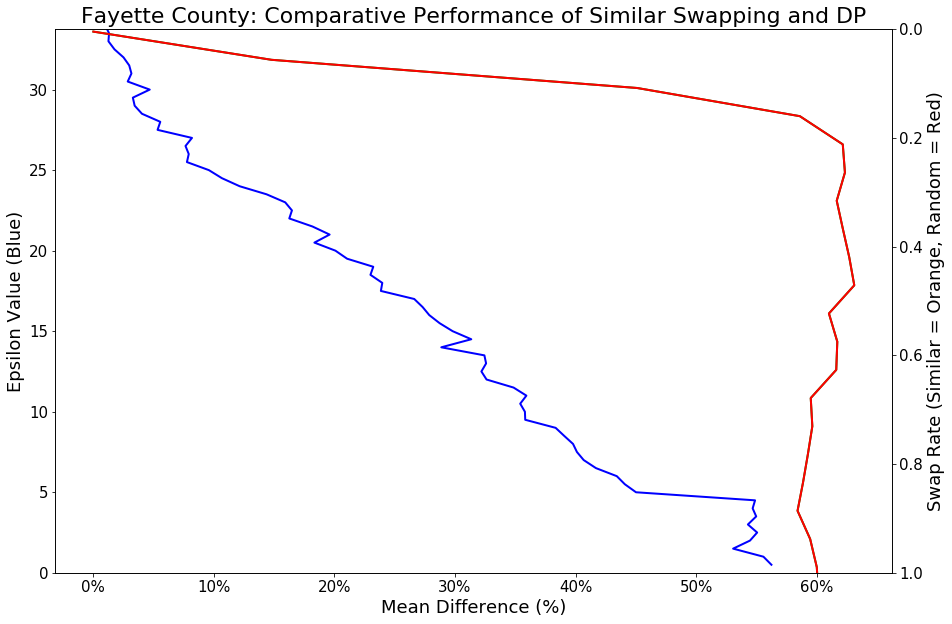

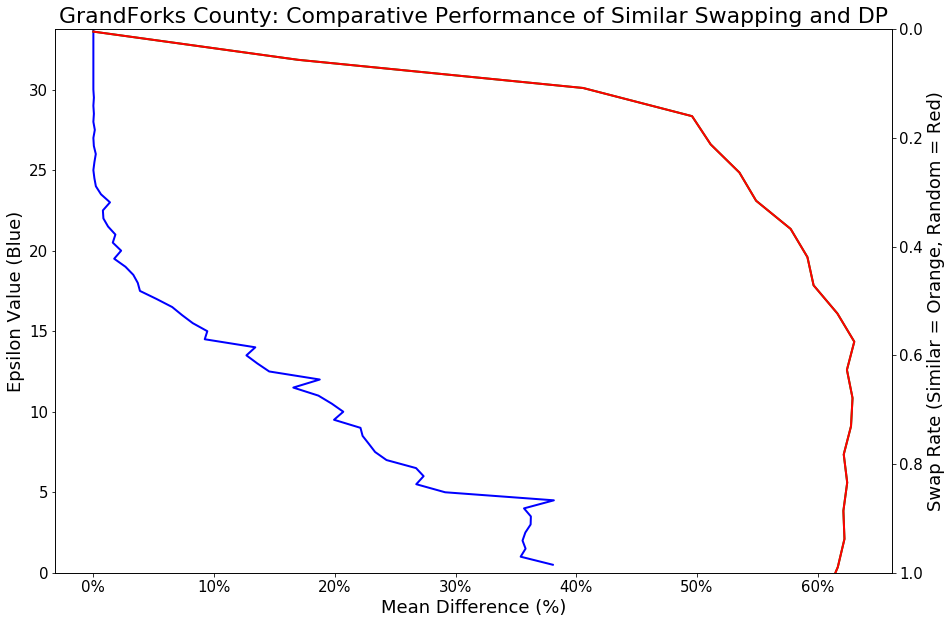

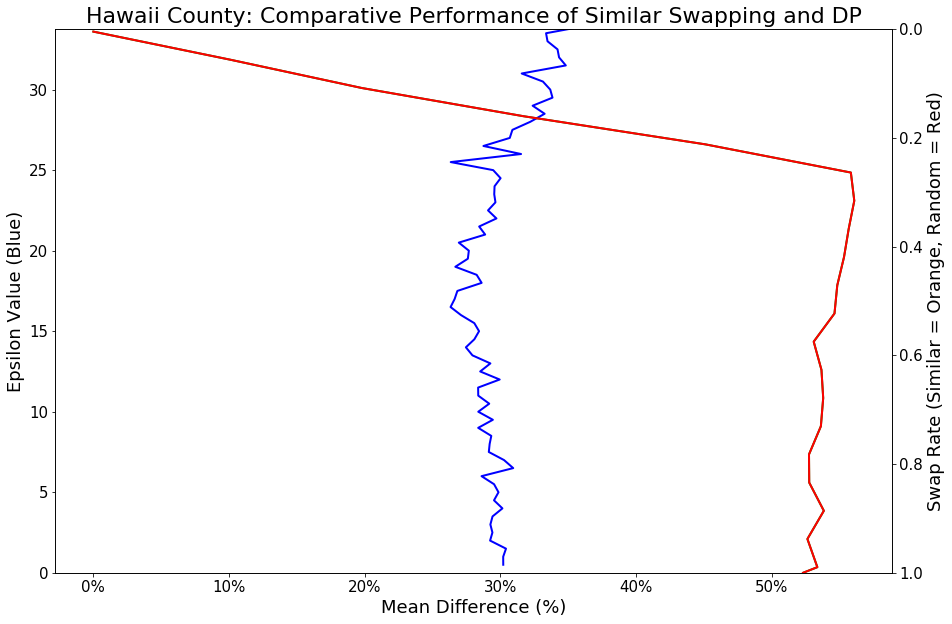

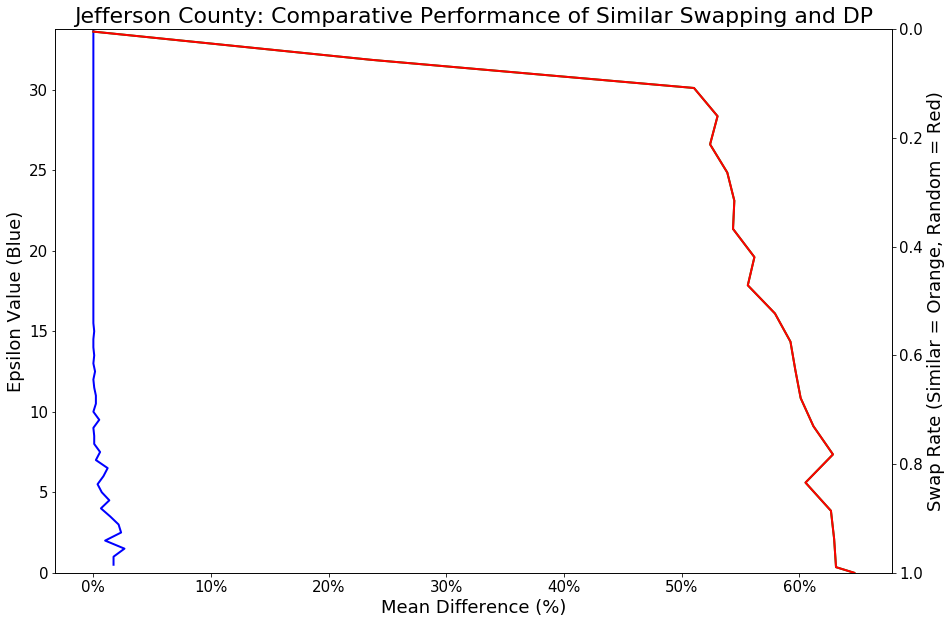

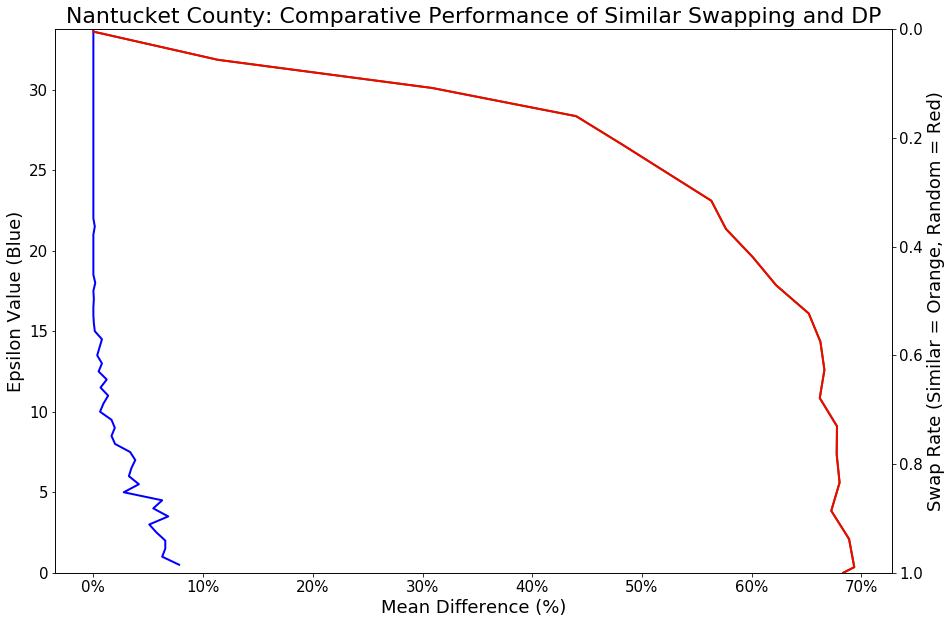

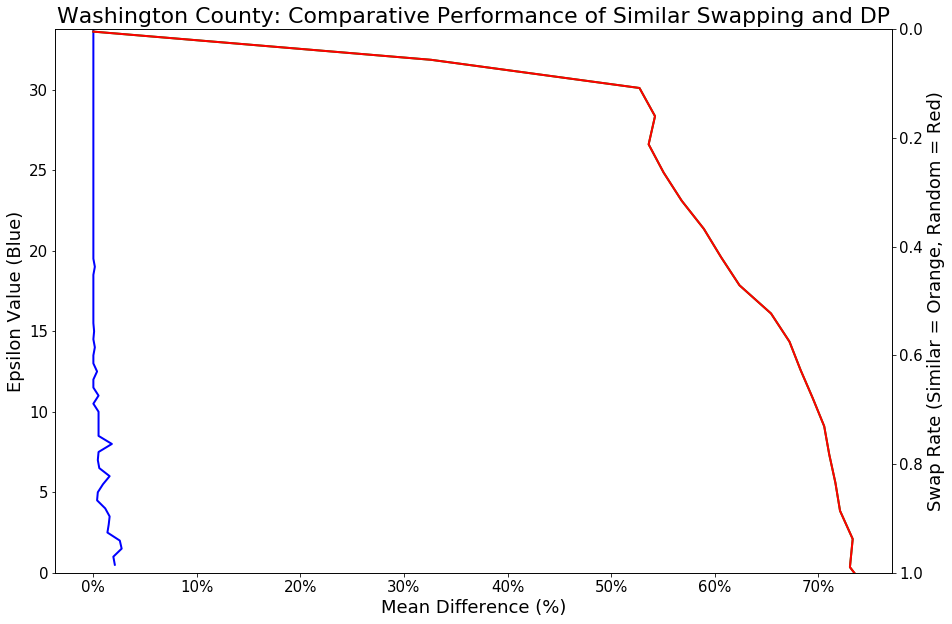

In [157]:
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
#counties = ['Alameda']
#counties = ['Armstrong']
#counties = ['Cibola']
#counties = ['Fayette']
#counties = ['GrandForks']
#counties = ['Hawaii']
#counties = ['Jefferson']
#counties = ['Nantucket']
# counties = ['Washington']

for county in counties:

    swap_x = []
    swap_y = []
    dp_x = []
    dp_y = []
    
    swap_x2 = []
    swap_y2 = []

    swap_df = pd.read_csv (r'mean_dif/'+county+'/similar/swapping_final.csv')
    swap2_df = pd.read_csv (r'mean_dif/'+county+'/similar/swapping_final.csv')
    dp_df = pd.read_csv (r'mean_dif/'+county+'/dp/dp.csv')
    #for i, row in dp_df.iterrows():
    nn=0
    swap_x.append(0)
    swap_y.append(0)
    for i, row in swap_df.iterrows():
        swap_x.append(float(row['filename']))
        swap_y.append(row['mean_difference'])
    
    swap_x2.append(0)
    swap_y2.append(0)
    for i, row in swap2_df.iterrows():
        swap_x2.append(float(row['filename']))
        swap_y2.append(row['mean_difference'])
    
    
    for i, row in dp_df.iterrows():
        dp_x.append(float(row['filename']))
        dp_y.append(row['mean_difference'])
    
    
    fig = plt.figure(figsize=(15,10))

    plt.title(county+' County: Comparative Performance of Similar Swapping and DP', size=22)
    
    ax1 = fig.add_subplot()
    
    ax1.plot(dp_y, [i * 5 for i in dp_x], color = 'blue', linewidth=2)
    
    print(dp_y, [i/i for i in dp_x])
    
    ax1.set_ylim([0,33.75])
    ax1.set_ylabel("Epsilon Value (Blue)", size=18)
    
    
    ax1.set_xlabel("Mean Difference (%)", size=18)
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    plt.xticks(size=15)
    plt.yticks(size=15)
    
    
    
    ax2 = fig.add_subplot()
    
    print(type(swap_y))
    for s in range(0, len(swap_x)):
        swap_y[s] = str(swap_y[s])
        
    swap_y.reverse()
    
    for s in range(0, len(swap_x)):
        swap_y[s] = float(swap_y[s])
    
    s1 = [x*35 for x in swap_x]
    
    for s in range(0, len(swap_x2)):
        swap_y2[s] = str(swap_y2[s])
        
    swap_y2.reverse()
    
    for s in range(0, len(swap_x2)):
        swap_y2[s] = float(swap_y2[s])
    
    s2 = [x*35 for x in swap_x2]
   
    
    ax2.plot(swap_y, s1, color = 'green', linewidth=2)
    ax2.plot(swap_y2, s2, color = 'red', linewidth=2)
    #ax2.invert()
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Swap Rate (Similar = Orange, Random = Red)", size=18)
    ax2.set_ylim([1,0])
    plt.yticks(size=15)
    
    plt.xticks(size=15)
    plt.savefig('../figures/finalcomparesideways/'+county+'.png')
    
    
    
    
    #handles, labels = axes.get_legend_handles_labels()
    
    